<h1>Project 3 Ragnar Frisch</h1>

<h2>Comparative Analysis of Food Consumption Patterns and Nutritional Intake in rural Guatemala and Senegal</h2>

In this project, we delve into the food consumption patterns in Guatemala, aiming to uncover the nutritional landscape of the region as a whole and its rural regions. By leveraging detailed household expenditure data, we attempt to quantify the nutritional intake across different demographics. This analysis not only sheds light on the dietary habits of Guatemalans but also sets the stage for a comparative study with Senegal, aiming to understand the nutritional disparities and similarities between these two geographically and culturally distinct countries

In [1]:
#importing
%pip install python-gnupg
%pip install eep153_tools
!pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install eep153_tools --upgrade

<h2>[A] Getting the Data</h2>

In [3]:
from eep153_tools.sheets import read_sheets

url = 'https://docs.google.com/spreadsheets/d/1YupX14TogoubSrlHtG9OgfBdKUhsss29L63mcNDNCUo/'

guatemala_prices = read_sheets(url,sheet='Food Prices',nheaders=2)
p = guatemala_prices

In [4]:
guatemala_fct = read_sheets(url,sheet='FCT')
fct = guatemala_fct

In [5]:
guatemala_hhc = read_sheets(url,sheet='Household Characteristics')
z = guatemala_hhc

In [6]:
guatemala_expenditures = read_sheets(url,sheet='Food Expenditures')
x = guatemala_expenditures

In [7]:
import pandas as pd
def clean_multiindex_df(df):
    # If the columns are a MultiIndex, join them with an underscore, otherwise just strip them
    if isinstance(df.columns, pd.MultiIndex):
        df.columns = ['_'.join(map(str, col)).strip() for col in df.columns.values]
    else:
        df.columns = [col.strip() for col in df.columns.tolist()]

    # Remove duplicated columns
    df = df.loc[:, ~df.columns.duplicated(keep='first')]

    # Drop columns that start with 'Unnamed'
    df = df.drop([col for col in df.columns if col.startswith('Unnamed')], axis=1)

    # Remove duplicated rows
    df = df.loc[~df.index.duplicated(), :]

    return df

# Clean the DataFrames with MultiIndex columns
p_cleaned = clean_multiindex_df(p)
fct_cleaned = clean_multiindex_df(fct)
z_cleaned = clean_multiindex_df(z)
x_cleaned = clean_multiindex_df(x)


In [8]:
import numpy as np
if 'm' not in x.columns:
    x_cleaned['m'] = 1

x = x_cleaned.set_index(['i','t','m'])
x.columns.name = 'j'

x = x.apply(lambda x: pd.to_numeric(x,errors='coerce'))
x = x.replace(0,np.nan)

x

,,j,Cooking Oil,Water (bottle),Avocado,Mineral Water,Garlic,Mushrooms,Celery,Rice,Peas,Corn Atole,...,Tea,Tomatoes,Tortillas,Tostadas,Beef Entrails,Chicken Giblets,Yogurt,Yucca,Carrots,Leafcutter Ants and Other Insect
i,t,m,,,,,,,,,,,,,,,,,,,,,
1,2000,Metropolitana,7.5,20.0,5.0,6.00,1.00,NaN,2.0,5.00,NaN,NaN,...,7.0,9.0,60.0,NaN,NaN,21.0,NaN,NaN,3.6,NaN
10,2000,Metropolitana,15.0,15.0,30.0,NaN,2.00,20.0,2.0,10.00,NaN,NaN,...,8.5,14.0,30.0,NaN,30.0,12.5,NaN,NaN,7.5,NaN
100,2000,Metropolitana,13.0,10.5,NaN,16.00,0.25,NaN,2.0,6.50,NaN,2.0,...,NaN,2.5,4.0,NaN,16.0,NaN,NaN,NaN,3.0,NaN
1000,2000,Central,9.5,10.0,NaN,NaN,1.50,NaN,1.5,10.00,NaN,NaN,...,NaN,9.0,60.0,NaN,NaN,NaN,NaN,NaN,6.0,NaN
1001,2000,Central,10.0,20.0,5.0,7.75,1.00,NaN,2.0,5.00,2.0,4.0,...,22.0,6.0,37.5,NaN,12.0,NaN,NaN,1.0,3.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2000,Central,NaN,NaN,NaN,18.00,NaN,NaN,1.0,12.00,NaN,NaN,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
996,2000,Central,13.0,12.0,NaN,12.00,6.00,NaN,2.0,15.00,1.5,NaN,...,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,2000,Central,1.5,NaN,NaN,6.50,NaN,NaN,NaN,2.25,NaN,NaN,...,NaN,8.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
z = z_cleaned
if 'm' not in z.columns:
    z['m'] = 1

z = z.set_index(['i','t','m'])
z.columns.name = 'j'

z = z.apply(lambda x: pd.to_numeric(x,errors='coerce'))

z

,,j,Males 00-03,Females 00-03,Males 04-08,Females 04-08,Males 09-13,Females 09-13,Males 14-18,Females 14-18,Males 19-30,Females 19-30,Males 31-50,Females 31-50,Males 51-99,Females 51-99,log HSize,Rural
i,t,m,,,,,,,,,,,,,,,,
1,2000,Metropolitana,0,1,0,0,0,0,0,0,1,1,0,1,0,0,1.386294,0
2,2000,Metropolitana,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1.098612,0
3,2000,Metropolitana,0,0,0,0,2,0,0,0,1,0,1,1,1,0,1.791759,0
4,2000,Metropolitana,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.000000,0
5,2000,Metropolitana,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1.098612,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7272,2000,Suroriente,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.000000,1
7273,2000,Suroriente,1,0,1,1,0,0,0,0,1,1,0,0,0,0,1.609438,1
7274,2000,Suroriente,0,1,1,0,1,1,0,1,0,0,1,1,0,0,1.945910,1


In [10]:
q = p_cleaned
if 'm' not in q.columns:
    q['m'] = 1

q = q.apply(lambda x: pd.to_numeric(x,errors='coerce'))
q = q.replace(0,np.nan)

q

,,2000_Central,2000_Metropolitana,2000_Noroccidente,2000_Nororiente,2000_Norte,2000_Peten,2000_Suroccidente,2000_Suroriente,m
j,u,,,,,,,,,
Cooking Oil,lbs,5.010737,5.368647,4.545454,4.563468,5.368647,5.000000,3.863636,5.368647,1
Water (bottle),lbs,0.454545,0.240500,0.240500,0.264550,0.240500,0.300625,0.245700,0.288600,1
Avocado,lbs,1.865672,3.544776,1.492537,3.731343,1.492537,1.492537,1.492537,2.985075,1
Mineral Water,lbs,2.750779,2.731270,3.209243,3.209243,3.209243,3.851091,3.209243,3.209243,1
Garlic,lbs,4.545455,4.545455,4.545455,9.090909,3.787879,9.090909,4.545455,4.545455,1
...,...,...,...,...,...,...,...,...,...,...
Chicken Giblets,lbs,4.000000,4.500000,4.000000,5.000000,4.000000,4.000000,3.875000,4.000000,1
Yogurt,lbs,8.227273,9.090909,8.181818,8.658009,7.272727,8.409091,6.818182,4.545454,1
Yucca,lbs,2.000000,2.500000,1.000000,2.000000,1.339286,2.000000,1.500000,2.000000,1


In [11]:
fct.index.name = 'n'

fct = fct.apply(lambda x: pd.to_numeric(x,errors='coerce'))

fct

,j,2000,Code,Nutrient,Agua,Energía,Proteina,Grasa Total,Carbo-hidratos,Fibra Diet. total,...,Colesterol,Potasio,Sodio,Zinc,Magnesio,Vit. B6,Vit. B12,Ac. Fólico,Folato Equiv. FD,Fracción Comestible
n,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,16029,NaN,0.00,884,0.00,100.00,0.00,0.0,...,0,0,0,0.00,0,0.00,0.00,0,0,1.00
1,NaN,NaN,3046,NaN,69.80,168,17.89,9.21,2.13,0.0,...,240,226,77,3.01,18,0.52,10.83,0,350,1.00
2,NaN,NaN,11005,NaN,73.23,160,2.00,14.66,8.53,6.7,...,0,485,7,0.64,29,0.26,0.00,0,81,0.74
3,NaN,NaN,17016,NaN,87.60,48,0.00,0.00,12.30,0.0,...,0,2,12,0.10,1,0.00,0.00,0,0,1.00
4,NaN,NaN,11006,NaN,63.80,134,5.30,0.20,29.30,0.0,...,0,529,19,1.00,0,0.00,0.00,3,0,0.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,NaN,NaN,17062,NaN,99.70,1,0.00,0.00,0.20,0.0,...,0,9,1,0.04,1,0.00,0.00,0,1,1.00
87,NaN,NaN,11157,NaN,93.80,21,0.80,0.30,4.60,1.2,...,0,237,5,0.17,0,0.08,0.00,0,15,0.98
88,NaN,NaN,14057,NaN,48.80,194,5.00,1.50,43.80,0.0,...,0,0,0,0.00,0,0.00,0.00,0,0,1.00


<h2>[A] Demand System for All Households</h2>

In [12]:
import cfe

result = cfe.Regression(y=np.log(x.stack()),d=z)

result.get_beta().sort_values(ascending=False)


j
Juice (Branded)    1.666867
Ice Cream          1.641413
Bananas            1.557200
Candies            1.496632
Sweets             1.449969
                     ...   
Other Sauces       0.656535
Beans              0.620259
Salt               0.565418
Tortillas          0.409561
Maize              0.060084
Name: beta, Length: 76, dtype: float64

In [13]:
result.to_pickle('./foo.pickle')

In [14]:
result = cfe.read_pickle('foo.pickle')
result.predicted_expenditures()

i     t     m              j             
1     2000  Metropolitana  Avocado             7.131134
                           Bananas            16.368000
                           Beans               9.351316
                           Beef              102.055889
                           Beef Entrails      13.977229
                                                ...    
7276  2000  Suroriente     Tostadas            8.796111
                           Water (bottle)      9.580927
                           Watermelon          7.935121
                           Wheat Flour         4.943983
                           Yucca               3.456677
Length: 515736, dtype: float64

In [15]:
from cfe import regression as rgsn
import numpy as np

r = rgsn.read_pickle('foo.pickle')
xhat = result.predicted_expenditures()
p = np.exp(r.get_Ar())

Text(0.5, 0, 'Quantities of Beef Demanded')

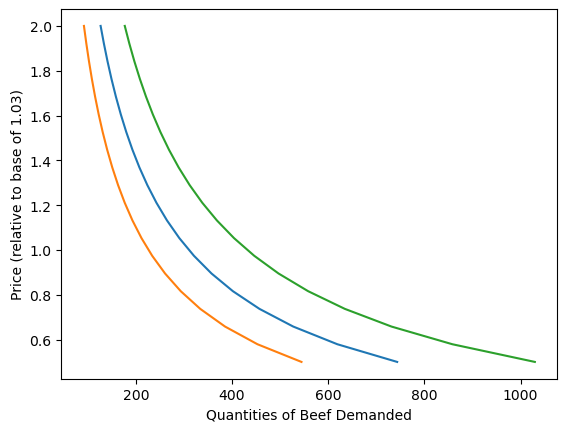

In [16]:
import matplotlib.pyplot as plt

use = 'Beef'  # Good we want demand curve for

scale = np.linspace(.5,2,20)

# Total food expenditures per household
xbar = xhat.groupby(['i','t','m']).sum()

# Reference budget
xref = xbar.quantile(0.5)  # Household at 0.5 quantile is median

# Reference prices
pbar = p.xs(2000, level='t').groupby('j').mean()
#pbar = pbar[use]

def my_prices(p0,p=pbar,j='Beef'):
    """
    This just changes the price of good j, holding other prices constant
    """
    p = p.copy()
    p.loc[j] = p0
    return p


# Demand for Beef for household at median budget
plt.plot([r.demands(xref,my_prices(pbar[use]*s,pbar))[use] for s in scale],scale)

# Demand for Beef for household at 25% percentile
plt.plot([r.demands(xbar.quantile(0.25),my_prices(pbar[use]*s,pbar))[use] for s in scale],scale)

# Demand for Beef for household at 75% percentile
plt.plot([r.demands(xbar.quantile(0.75),my_prices(pbar[use]*s,pbar))[use] for s in scale],scale)

plt.ylabel(f"Price (relative to base of {pbar[use]:.2f})")
plt.xlabel(f"Quantities of {use} Demanded")

The blue curve, representing the 25th percentile, starts higher and is steeper than the green curve, representing the 75th percentile. This suggests that households at the 25th percentile experience a higher initial price relative to the base and a larger decrease in the quantity of beef demanded as the price increases compared to the households at the 75th percentile. This could imply that lower-percentile households are more sensitive to price changes, which would be consistent with a higher income elasticity of demand for beef for these households.

In [17]:
r.demands(20000,pbar).index.tolist()

['Avocado',
 'Bananas',
 'Beans',
 'Beef',
 'Beef Entrails',
 'Beer',
 'Beets',
 'Bread (french)',
 'Bread (sliced)',
 'Bread (sweet)',
 'Cabbages',
 'Cakes',
 'Candies',
 'Carrots',
 'Celery',
 'Chayote',
 'Chicken',
 'Chicken Giblets',
 'Chilies',
 'Chocolate',
 'Cigarettes',
 'Coffee (instant)',
 'Cookies',
 'Cooking Oil',
 'Corn Flakes',
 'Corn Tamales',
 'Cornmeal',
 'Crema Fresca',
 'Cucumbers',
 'Dried Seeds',
 'Eggs',
 'Fish (Fresh)',
 'Garlic',
 'Granulated Sugar',
 'Herbs',
 'Ice Cream',
 'Incaparina',
 'Juice (Branded)',
 'Juices (Packaged)',
 'Lemons',
 'Lettuce',
 'Maize',
 'Margarine',
 'Melons',
 'Milk',
 'Milk (powdered)',
 'Mineral Water',
 'Onions',
 'Oranges',
 'Other',
 'Other Atoles',
 'Other Sauces',
 'Paches',
 'Papaya',
 'Pasta',
 'Peas',
 'Pineapples',
 'Pork',
 'Pork (cracklings)',
 'Potatoes',
 'Queso',
 'Rice',
 'Rolled Oats',
 'Salt',
 'Sausages',
 'Soup',
 'Spices',
 'Sweets',
 'Tomato Sauce',
 'Tomatoes',
 'Tortillas',
 'Tostadas',
 'Water (bottle)',
 'Wa

<Axes: xlabel='yhat', ylabel='y'>

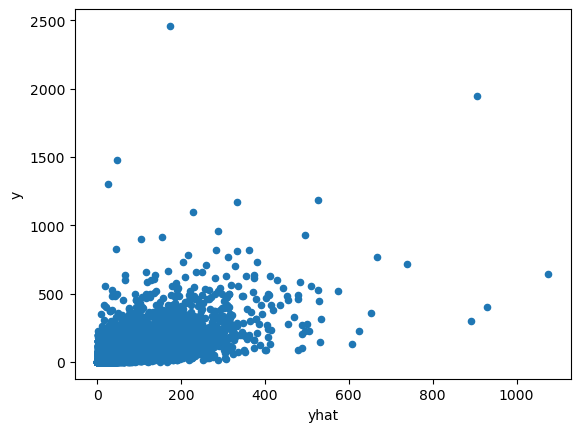

In [18]:
from cfe.estimation import drop_columns_wo_covariance

y = drop_columns_wo_covariance(z,min_obs=17)
use = y.index.intersection(x.index)

y = y.loc[use,:]

d = x
d = x.loc[use,:]
y = y.stack()

d = d.stack()

df = pd.DataFrame({'y':d,'yhat':xhat})
df.plot.scatter(x='yhat',y='y')

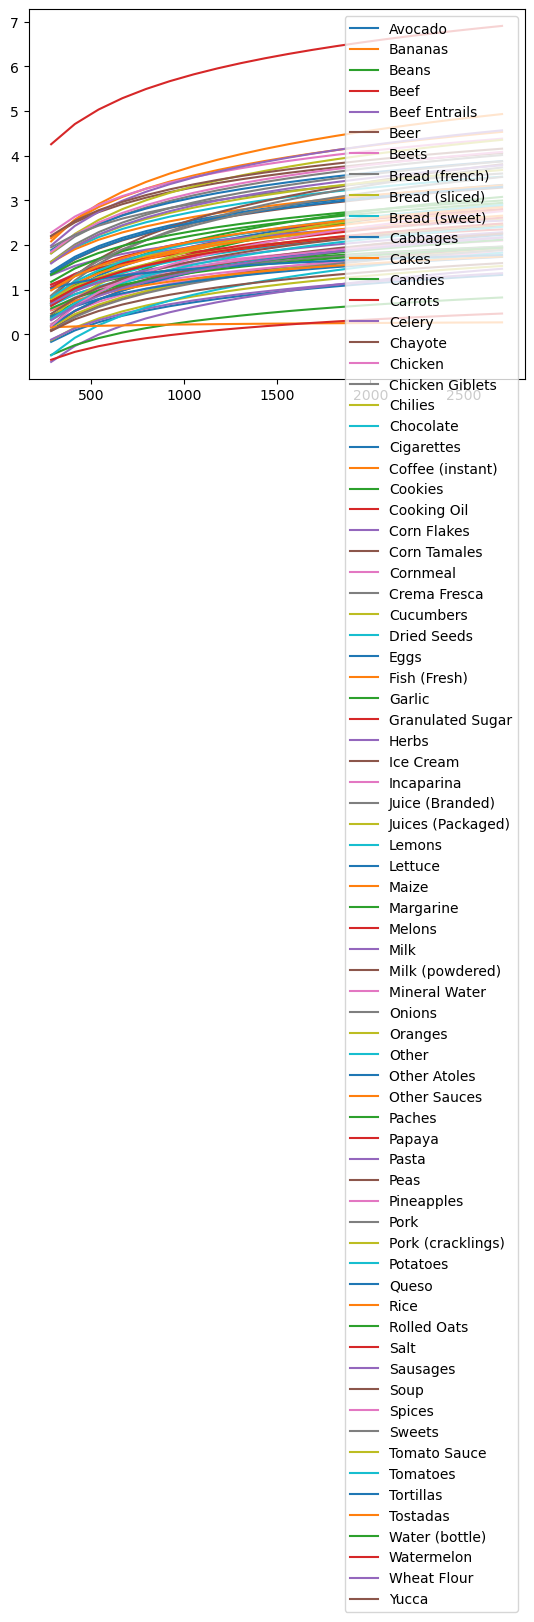

In [57]:
fig,ax = plt.subplots()

X = np.linspace(xbar.quantile(0.001),xbar.quantile(0.99),20)

ax.plot(X,[np.log(r.demands(x,pbar)) for x in X])
ax.legend(r.demands(xref,pbar).index.tolist())

<h3>Relative Income Elasticity</h3>

In [21]:
result.get_beta().sort_values()

j
Maize              0.060084
Tortillas          0.409561
Salt               0.565418
Beans              0.620259
Other Sauces       0.656535
                     ...   
Sweets             1.449969
Candies            1.496632
Bananas            1.557200
Ice Cream          1.641413
Juice (Branded)    1.666867
Name: beta, Length: 76, dtype: float64

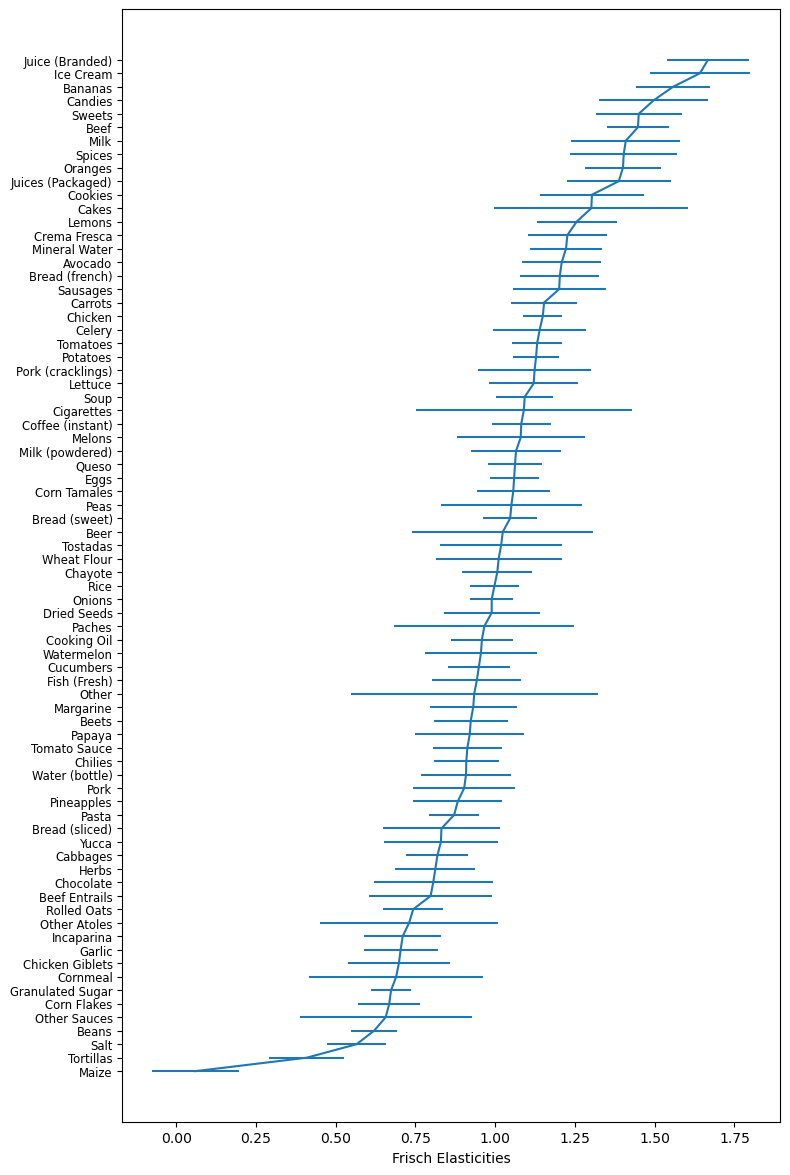

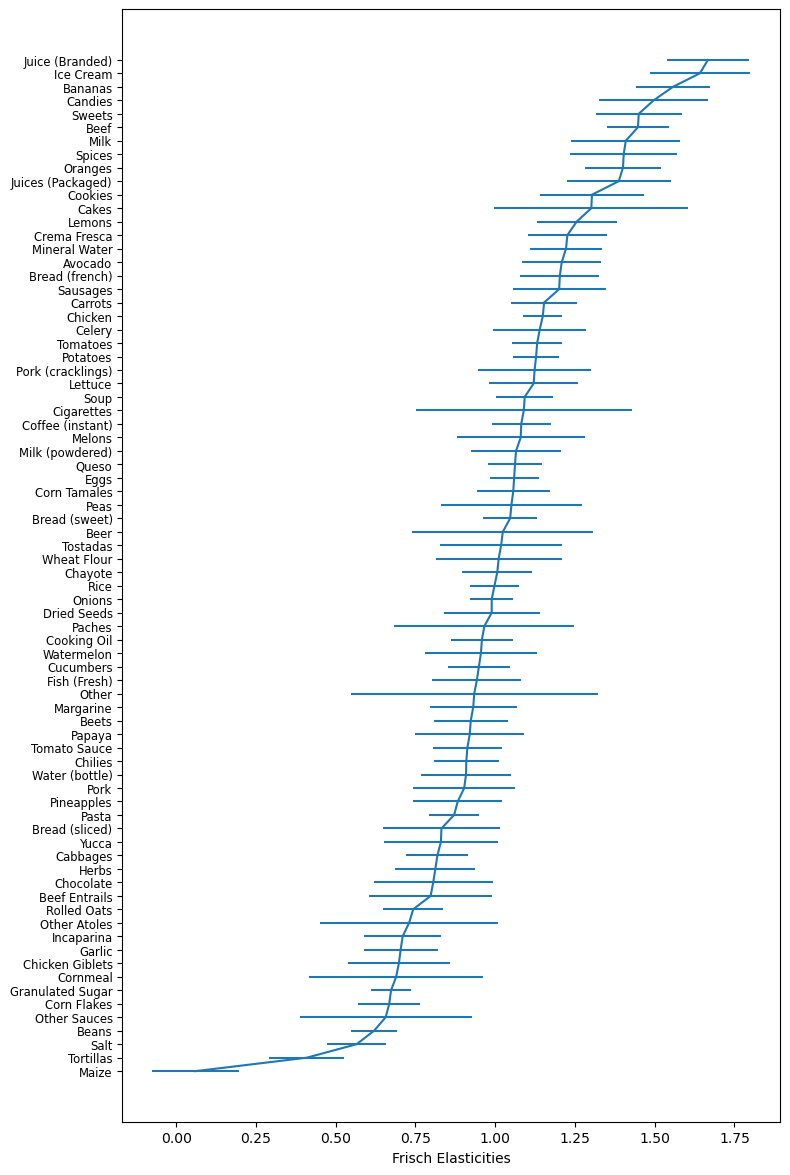

In [22]:
result.graph_beta()

In [23]:
result.gamma

k,Males 00-03,Females 00-03,Males 04-08,Females 04-08,Males 09-13,Females 09-13,Males 14-18,Females 14-18,Males 19-30,Females 19-30,Males 31-50,Females 31-50,Males 51-99,Females 51-99,log HSize,Rural,Constant
j,,,,,,,,,,,,,,,,,
Avocado,-0.113787,-0.154271,-0.052185,-0.075399,-0.043531,-0.057057,-0.007848,-0.032615,0.037288,0.085916,0.092047,0.204477,0.037729,0.004733,0.264470,-0.290258,1.715108
Bananas,-0.132104,-0.160179,-0.078016,-0.077231,-0.065582,-0.058726,-0.005501,-0.000520,0.054295,0.099780,0.058638,0.163866,-0.034846,0.069719,0.290604,-0.417070,2.573631
Beans,0.008229,-0.012377,0.041968,0.015699,0.078386,0.036391,0.155165,0.069580,0.085326,0.039537,0.091785,0.052839,0.120704,0.086230,0.321519,0.167655,2.570693
Beef,-0.175282,-0.143385,-0.095217,-0.083608,-0.051129,-0.060364,0.004381,-0.001599,0.091003,0.124310,0.137452,0.140678,0.013439,-0.019238,0.396879,-0.405156,4.185058
Beef Entrails,0.040482,-0.030306,-0.046508,0.028354,0.049665,0.061699,0.010200,0.093729,0.022685,0.124958,0.080566,0.056687,0.042477,0.013257,0.058879,-0.229071,2.585558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tostadas,-0.222922,-0.109068,-0.134434,-0.059171,0.007077,-0.099574,0.022812,-0.055201,-0.101009,-0.048134,-0.054742,-0.057514,-0.118890,-0.107662,0.648027,-0.082593,2.100750
Water (bottle),0.006573,-0.005665,0.001005,-0.018112,-0.084946,-0.010131,-0.027803,0.012465,0.060607,0.025416,0.100745,0.228945,0.024621,0.119268,0.067414,-0.525289,2.564404
Watermelon,-0.004826,-0.041615,0.003598,-0.073471,-0.032490,0.049048,0.002484,0.055817,0.027256,0.072846,0.021781,0.091616,-0.025972,-0.067859,0.180818,-0.123484,1.935350


<h3>Demand System for Rural Households</h3>

In [24]:
rural = z[z['Rural'] == 1]
rural

,,j,Males 00-03,Females 00-03,Males 04-08,Females 04-08,Males 09-13,Females 09-13,Males 14-18,Females 14-18,Males 19-30,Females 19-30,Males 31-50,Females 31-50,Males 51-99,Females 51-99,log HSize,Rural
i,t,m,,,,,,,,,,,,,,,,
471,2000,Metropolitana,0,0,0,0,0,0,1,0,1,2,1,0,1,1,1.945910,1
472,2000,Metropolitana,1,0,0,1,1,0,0,0,1,1,1,0,2,1,2.197225,1
473,2000,Metropolitana,0,1,0,2,0,0,0,0,0,1,1,0,0,0,1.609438,1
474,2000,Metropolitana,0,0,0,0,0,1,1,0,1,1,0,1,1,0,1.791759,1
475,2000,Metropolitana,0,0,1,1,2,0,1,0,2,0,0,1,1,0,2.197225,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7272,2000,Suroriente,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.000000,1
7273,2000,Suroriente,1,0,1,1,0,0,0,0,1,1,0,0,0,0,1.609438,1
7274,2000,Suroriente,0,1,1,0,1,1,0,1,0,0,1,1,0,0,1.945910,1


In [25]:
result2 = cfe.Regression(y=np.log(x.stack()),d=rural)

result2.get_beta().sort_values(ascending=False)

j
Juice (Branded)    1.531221
Bananas            1.517340
Bread (french)     1.461799
Ice Cream          1.443621
Candies            1.417630
                     ...   
Beans              0.601558
Salt               0.541791
Corn Flakes        0.501849
Garlic             0.497204
Maize              0.010490
Name: beta, Length: 62, dtype: float64

In [26]:
result2.predicted_expenditures()

i     t     m              j            
471   2000  Metropolitana  Avocado           10.478536
                           Bananas           30.789086
                           Beans             27.694353
                           Beef             208.122900
                           Beef Entrails     21.526356
                                               ...    
7276  2000  Suroriente     Sweets             8.092661
                           Tomato Sauce       7.083565
                           Tomatoes           7.623991
                           Watermelon         8.281970
                           Yucca              3.065000
Length: 216504, dtype: float64

In [27]:
result2.get_beta().sort_values()

j
Maize              0.010490
Garlic             0.497204
Corn Flakes        0.501849
Salt               0.541791
Beans              0.601558
                     ...   
Candies            1.417630
Ice Cream          1.443621
Bread (french)     1.461799
Bananas            1.517340
Juice (Branded)    1.531221
Name: beta, Length: 62, dtype: float64

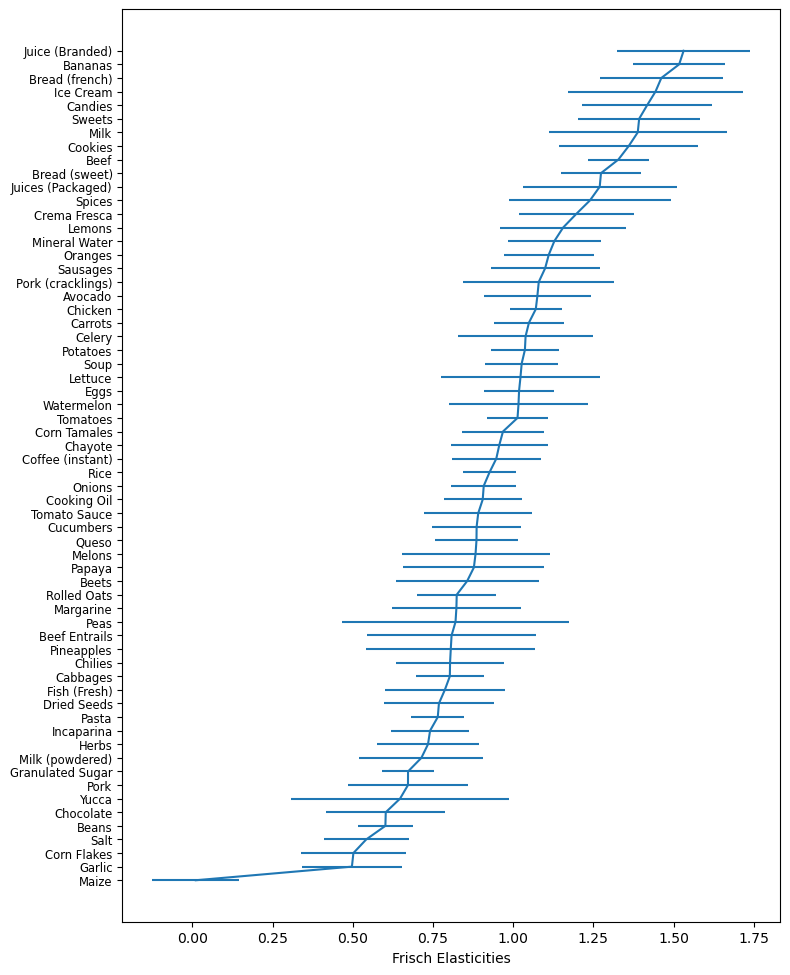

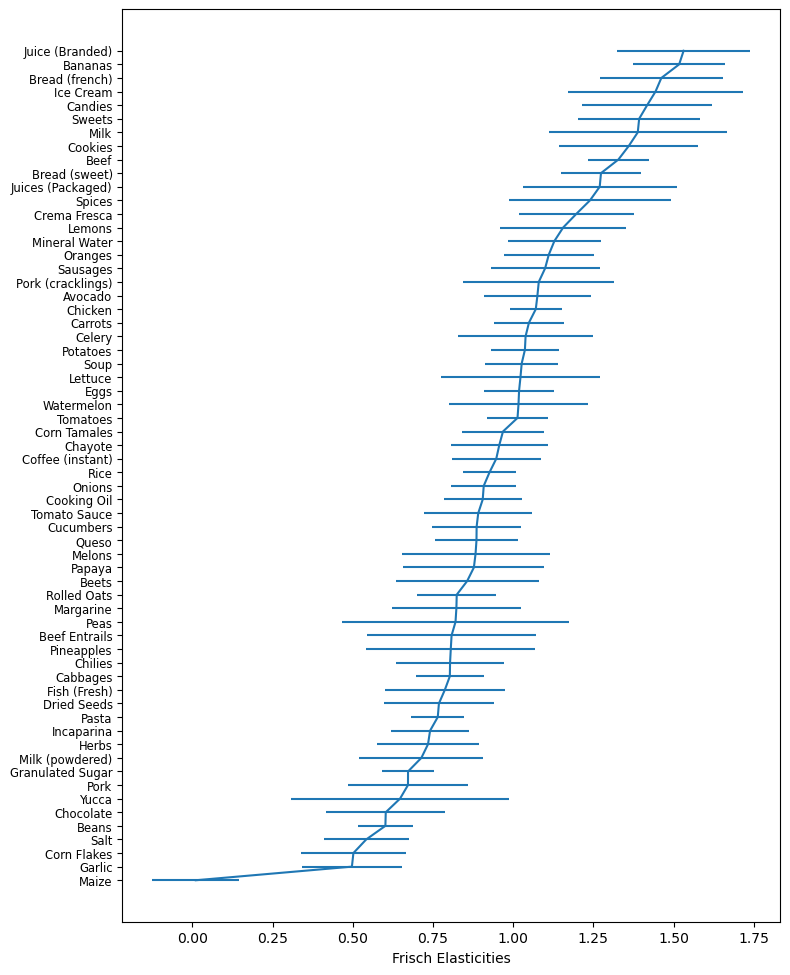

In [28]:
result2.graph_beta()

<h2>[B] Calculating Nurtition</h2>

In [29]:
import cfe

result = cfe.read_pickle('foo.pickle')  # Get persistent result saved above...

xhat = result.predicted_expenditures()

# Expenditures divided by prices/kg gives quantities in kgs...
qhat = (xhat.unstack('j')/p).dropna(how='all')

# Drop missing columns
qhat = qhat.loc[:,qhat.count()>0]

In [30]:
use = qhat.columns

nutrients = qhat[use]
nutrients.mean()

t     m           j             
2000  Central     Avocado            8.472059
                  Bananas           19.079820
                  Beans             15.190911
                  Beef              89.024569
                  Beef Entrails     17.058330
                                      ...    
      Suroriente  Tostadas          10.535617
                  Water (bottle)    16.695208
                  Watermelon         8.437203
                  Wheat Flour        5.773293
                  Yucca              4.054369
Length: 608, dtype: float64

In [33]:
nutrients.describe()

t             2000                                                       \
m          Central                                                        
j          Avocado      Bananas        Beans         Beef Beef Entrails   
count  6786.000000  6786.000000  6786.000000  6786.000000   6786.000000   
mean      8.472059    19.079820    15.190911    89.024569     17.058330   
std       5.357737    14.463434     6.929666    64.856666      6.466217   
min       1.118665     1.546594     3.146136     6.614602      4.205128   
25%       4.811409     9.922361    10.496556    47.168451     12.491514   
50%       7.162864    15.456577    13.710818    72.753618     15.958641   
75%      10.691539    23.993713    18.251855   111.048902     20.326245   
max      66.575402   334.221154    67.798013   956.590400     60.936660   

t                                                                            \
m                                                                             
j             Beer        Beets Bread (french) Bread (sliced) Bread (sweet)   
count  6786.000000  6786.000000    6786.000000    6786.000000   6786.000000   
mean     42.144779     5.052096      21.026915      14.173954     21.756288   
std      20.475544     1.899794      15.439705       5.269706     12.698566   
min       6.057318     0.903048       1.998608       2.944364      2.519015   
25%      27.951711     3.743230      10.459769      10.500032     12.792530   
50%      37.688185     4.726382      16.877158      13.268801     19.117711   
75%      51.263993     6.010397      26.971626      16.828737     27.674607   
max     234.806067    26.928305     212.821392      62.575254    159.045148   

t      ...                                                                   \
m      ...   Suroriente                                                       
j      ...       Spices       Sweets Tomato Sauce     Tomatoes    Tortillas   
count  ...  6786.000000  6786.000000  6786.000000  6786.000000  6786.000000   
mean   ...     6.108737     9.267627     8.809928    11.052408    45.578548   
std    ...     3.695759     6.311925     3.436710     5.700242    17.995556   
min    ...     0.563759     0.946780     1.755823     1.173746    11.650231   
25%    ...     3.659287     5.123495     6.433700     7.186363    33.078125   
50%    ...     5.247146     7.694000     8.166046     9.878313    42.460066   
75%    ...     7.611669    11.634709    10.562406    13.718399    53.981853   
max    ...    62.203338    83.450748    35.751764    69.716875   178.548495   

t                                                                         
m                                                                         
j         Tostadas Water (bottle)   Watermelon  Wheat Flour        Yucca  
count  6786.000000    6786.000000  6786.000000  6786.000000  6786.000000  
mean     10.535617      16.695208     8.437203     5.773293     4.054369  
std       4.933318       8.664516     3.591845     3.104255     1.496822  
min       1.405323       2.983644     1.702401     0.781715     0.847918  
25%       7.072531      10.389813     5.938386     3.614798     3.018164  
50%       9.600090      14.799937     7.768656     5.071727     3.798693  
75%      12.965142      20.756341    10.153793     7.179664     4.797965  
max      50.030685      83.619211    35.980414    30.041777    15.919573  

[8 rows x 608 columns]

In [34]:
InputFiles = {'RDI':('1yVLriVpo7KGUXvR3hq_n53XpXlD5NmLaH1oOMZyV0gQ','RDI'),}

In [35]:
def get_clean_sheet(key,sheet=None):

    df = read_sheets(key,sheet=sheet)
    df.columns = [c.strip() for c in df.columns.tolist()]

    df = df.loc[:,~df.columns.duplicated(keep='first')]   

    df = df.drop([col for col in df.columns if col.startswith('Unnamed')], axis=1)

    df = df.loc[~df.index.duplicated(), :]

    return df

In [36]:
rdi = get_clean_sheet(InputFiles['RDI'][0],
                    sheet=InputFiles['RDI'][1])
rdi = rdi.set_index('n')
rdi.columns.name = 'k'

In [39]:
temp = z
temp

,,j,Males 00-03,Females 00-03,Males 04-08,Females 04-08,Males 09-13,Females 09-13,Males 14-18,Females 14-18,Males 19-30,Females 19-30,Males 31-50,Females 31-50,Males 51-99,Females 51-99,log HSize,Rural
i,t,m,,,,,,,,,,,,,,,,
1,2000,Metropolitana,0,1,0,0,0,0,0,0,1,1,0,1,0,0,1.386294,0
2,2000,Metropolitana,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1.098612,0
3,2000,Metropolitana,0,0,0,0,2,0,0,0,1,0,1,1,1,0,1.791759,0
4,2000,Metropolitana,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.000000,0
5,2000,Metropolitana,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1.098612,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7272,2000,Suroriente,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.000000,1
7273,2000,Suroriente,1,0,1,1,0,0,0,0,1,1,0,0,0,0,1.609438,1
7274,2000,Suroriente,0,1,1,0,1,1,0,1,0,0,1,1,0,0,1.945910,1


In [42]:
#temp.reset_index(level=['t', 'm'], drop=True, inplace=True)
temp = temp.drop(['log HSize', 'Rural'], axis = 1)

In [46]:
correct_order = ['M 00-03', 'F 00-03', 'M 04-08', 'F 04-08',
                 'M 09-13', 'F 09-13', 'M 14-18', 'F 14-18',
                 'M 19-30', 'F 19-30', 'M 31-50', 'F 31-50',
                 'M 51+', 'F 51+']

# Reorder the columns in `rdi` to match the order in `temp`
rdi = rdi[correct_order]

correct_column_names = [
    'Males 00-03', 'Females 00-03', 'Males 04-08', 'Females 04-08', 
    'Males 09-13', 'Females 09-13', 'Males 14-18', 'Females 14-18', 
    'Males 19-30', 'Females 19-30', 'Males 31-50', 'Females 31-50', 
    'Males 51+', 'Females 51+'
]
rdi.columns = correct_column_names


In [68]:
z = temp[rdi.columns.tolist()]

hh_rdi = z@rdi.T
hh_rwi = hh_rdi*7